<a href="https://colab.research.google.com/github/BHARGAVIGHEGDE/Machine_learning_projects/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing data dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso



In [ ]:
#data collection and data processing
car=pd.read_csv('/content/car data.csv')

In [ ]:
car.shape

(301, 9)

In [ ]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
car.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
car.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
car.Fuel_Type.value_counts()


Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [ ]:
car.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [ ]:
car.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [ ]:
car.replace({'Fuel_Type':{'Petrol':1,'Diesel':0,"CNG":2}},inplace=True)
car.replace({'Seller_Type':{'Dealer':1,'Individual':0}},inplace=True)
car.replace({'Transmission':{'Manual':1,'Automatic':0}},inplace=True)

In [ ]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,1,1,1,0
1,sx4,2013,4.75,9.54,43000,0,1,1,0
2,ciaz,2017,7.25,9.85,6900,1,1,1,0
3,wagon r,2011,2.85,4.15,5200,1,1,1,0
4,swift,2014,4.60,6.87,42450,0,1,1,0


In [ ]:
#splitting a and y
x=car.drop(['Car_Name','Selling_Price'],axis=1)
y=car['Selling_Price']

In [ ]:
#train and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
print(x_train.shape,x_test.shape)

(240, 7) (61, 7)


In [ ]:
print(y_train.shape,y_test.shape)

(240,) (61,)


In [ ]:
#model training
model=LinearRegression()


In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [37]:
#finding the co relation of the given data
correlation=car.corr()

<Axes: >

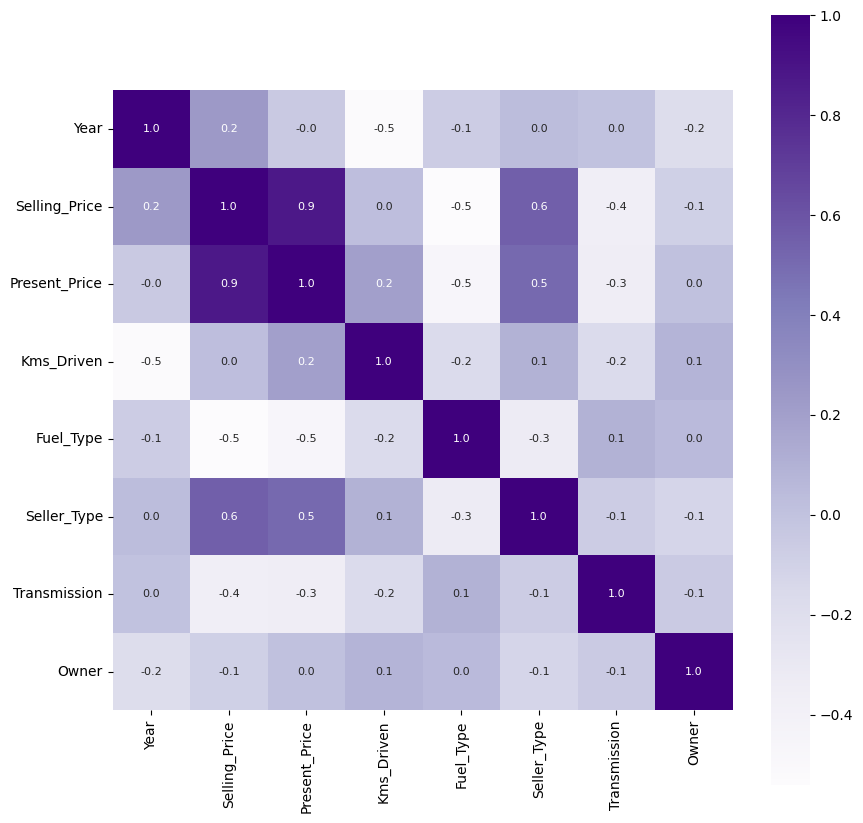

In [38]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Purples')

In [42]:
#model evaluation for training data
train_evaluation=model.predict(x_train)
#finding r square error
r_square_error=metrics.r2_score(y_train,train_evaluation)
print("r square erroe is",r_square_error)
#finding mean absolute erroe
mean_error=metrics.mean_absolute_error(y_train,train_evaluation)
print("mean error is",mean_error)

r square erroe is 0.8868747891031523
mean error is 1.1974525422211273


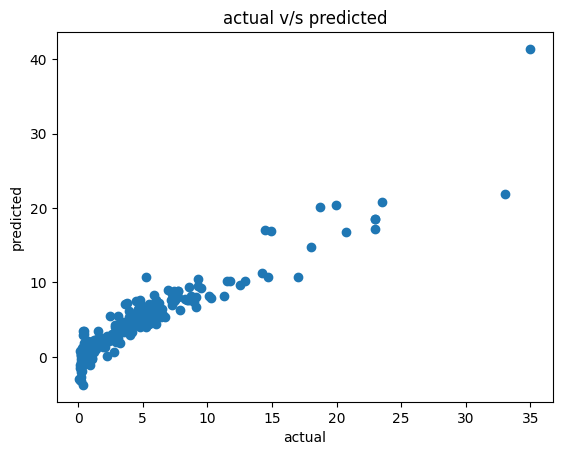

In [43]:
#visualize the actual and the predicted price for training data
plt.scatter(y_train,train_evaluation)
plt.title("actual v/s predicted")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

In [44]:
#model evaluation for testing data
test_evaluation=model.predict(x_test)
#finding r square error
r_square_error=metrics.r2_score(y_test,test_evaluation)
print("r square erroe is",r_square_error)
#finding mean absolute erroe
mean_error=metrics.mean_absolute_error(y_test,test_evaluation)
print("mean error is",mean_error)

r square erroe is 0.8488587201210178
mean error is 1.2610266969130992


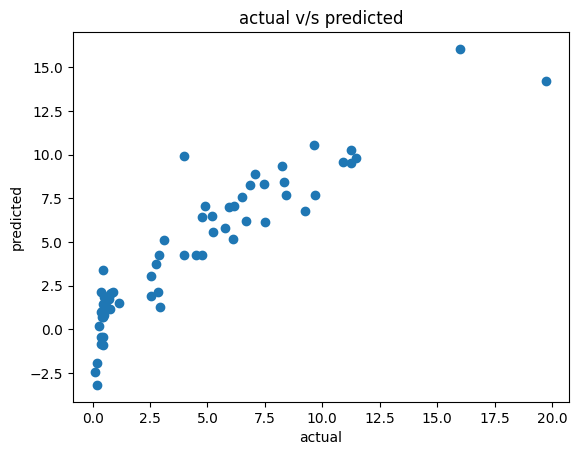

In [45]:
#visualize the actual and the predicted price for testing data
plt.scatter(y_test,test_evaluation)
plt.title("actual v/s predicted")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()